# Import Core Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

# Load Dataset

In [3]:
%run load_dataset.ipynb

In [4]:
all_subjects = ['1001','1002','1003','1004','1005','1006','1007','1008','1009','1010','1011','1012','1013','1014',]

In [5]:
X_all, y_all, subj_all, ts_all, hr_all = load_all_data(all_subjects)

Loading 1001's data
Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 1013's data
Loading 1014's data
Finished loading


# Data Preprocessing

In [26]:
%run preprocessing.ipynb
# includes wavelet denoising, normalization, PCA, LDA, SVD, etc.

In [27]:
print(X_all.shape, y_all.shape)

(28898, 3) (28898,)


In [8]:
X_all

array([[0.2322401 , 0.68496146, 0.47128758],
       [0.23198487, 0.68602821, 0.46923669],
       [0.2322401 , 0.68624156, 0.47090303],
       ...,
       [0.52133037, 0.4263186 , 0.31059357],
       [0.64058579, 0.47292789, 0.26550587],
       [0.61571594, 0.47622184, 0.30601807]])

# Group Data by Label and Normalize Data

In [9]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [10]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

## Show Plot for each Activity and Subject

In [11]:
# group X_all and y_all from load_dataset.ipynb by labels
#X_label, y_label = label_grouping(X_all, y_all, subj_all, new_label_list)

# normalize X_label
#X_norm = normalize_data(X_label)

In [12]:
#plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [13]:
# roll, pitch, yaw = calc_rpy(X_all, colors)
# rpy = np.array([roll, pitch, yaw]).transpose()

# print(rpy.shape)

# Apply PCA

In [14]:
# apply PCA and LDA to X_norm and rpy
# X_pca, pca = apply_pca(X_all, y_all, label_list)
# rpy_pca, pca_rpy = apply_pca(rpy, y_all, label_list)

# Reshape Data (Pure Label)

In [15]:
# get label-separated X and y
X_svm, y_svm = prepare_pure_label(X_all, y_all, subj_all, all_subjects, new_label_list)
y_svm = y_svm.reshape((y_svm.shape[0],))

In [16]:
print(X_svm.shape, y_svm.shape)

(28658, 180) (28658,)


# Reshape Data (Impure Label)

In [17]:
X_impure, y_impure = prepare_impure_label(X_all, y_all)
y_impure = y_impure.reshape((y_impure.shape[0],))

In [18]:
print(X_impure.shape, y_impure.shape)

(28838, 180) (28838,)


# Split Train and Test Set

In [19]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.2, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(23070, 180)
(5768, 180)


In [20]:
print(X_train.shape)
print(X_test.shape)

(22926, 180)
(5732, 180)


# SVM

In [28]:
svm_model = svm_classifier(X_train, y_train)
print("Finished training")

Finished training


In [29]:
filename = '../../model/svm_model.pkl'
pickle.dump(svm_model, open(filename, 'wb'))

In [30]:
y_pred_svm = svm_model.predict(X_test)

In [31]:
print(X_train.shape, X_tr.shape)
print(y_train.shape, y_tr.shape)

(22926, 180) (23070, 180)
(22926,) (23070,)


In [32]:
X_all

array([[0.2322401 , 0.68496146, 0.47128758],
       [0.23198487, 0.68602821, 0.46923669],
       [0.2322401 , 0.68624156, 0.47090303],
       ...,
       [0.52133037, 0.4263186 , 0.31059357],
       [0.64058579, 0.47292789, 0.26550587],
       [0.61571594, 0.47622184, 0.30601807]])

In [41]:
print(X_train.shape)
print(X_train)
print('--------')
print(X_test.shape)
print(X_test)

(22926, 180)
[[0.39 0.39 0.39 ... 0.35 0.35 0.35]
 [0.61 0.61 0.61 ... 0.56 0.54 0.54]
 [0.35 0.27 0.28 ... 0.24 0.3  0.23]
 ...
 [0.39 0.39 0.39 ... 0.35 0.35 0.35]
 [0.46 0.49 0.5  ... 0.38 0.4  0.4 ]
 [0.48 0.51 0.58 ... 0.26 0.31 0.34]]
--------
(5732, 180)
[[0.31 0.31 0.31 ... 0.24 0.24 0.23]
 [0.42 0.42 0.42 ... 0.51 0.47 0.46]
 [0.37 0.33 0.37 ... 0.57 0.58 0.58]
 ...
 [0.46 0.45 0.53 ... 0.43 0.4  0.49]
 [0.06 0.33 0.35 ... 0.34 0.31 0.32]
 [0.43 0.45 0.42 ... 0.34 0.32 0.47]]


In [34]:
# svm_model_2 = svm_classifier(X_tr, y_tr)
# print("Finished training")

In [35]:
# y_pred_svm_2 = svm_model_2.predict(X_te)

## SVM Evaluation

In [36]:
%run eval_score.ipynb

In [37]:
LABELS = ['sit','sleep','stand','walk']

0.541172365666434


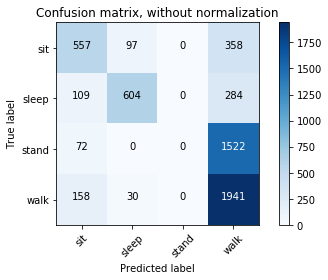

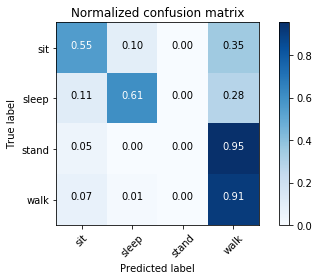

              precision    recall  f1-score   support

         sit       0.62      0.55      0.58      1012
       sleep       0.83      0.61      0.70       997
       stand       0.00      0.00      0.00      1594
        walk       0.47      0.91      0.62      2129

   micro avg       0.54      0.54      0.54      5732
   macro avg       0.48      0.52      0.48      5732
weighted avg       0.43      0.54      0.46      5732



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
acc = accuracy_score(y_test, y_pred_svm)
print(acc)

show_conf_matrix(y_test, y_pred_svm, LABELS)
show_clf_report(y_test, y_pred_svm, LABELS)

In [ ]:
acc = accuracy_score(y_te, y_pred_svm_2)
print(acc)

show_conf_matrix(y_te, y_pred_svm_2, LABELS)
show_clf_report(y_te, y_pred_svm_2, LABELS)

# Walk Algorithm

In [29]:
%run classifier_alg.ipynb

In [30]:
walk_exact = []
walk_label = 3
window_length = 60

for i in range(window_length, len(y_all)):
    if(y_all[i]==walk_label):
        walk_exact.append(walk_label)
    else:
        walk_exact.append(0)

In [32]:
walk_pred = classify_walk_2(X_pca, exceed_threshold=9)

## Walk Algorithm Evaluation

0.9223940633885845


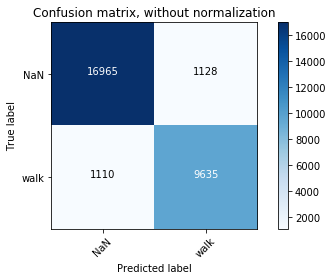

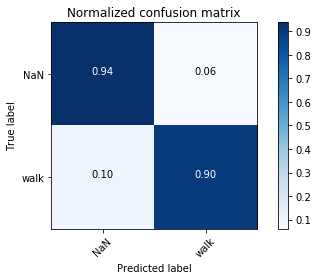

              precision    recall  f1-score   support

         NaN       0.94      0.94      0.94     18093
        walk       0.90      0.90      0.90     10745

   micro avg       0.92      0.92      0.92     28838
   macro avg       0.92      0.92      0.92     28838
weighted avg       0.92      0.92      0.92     28838



In [33]:
walk_lbl = ['NaN','walk']

acc = accuracy_score(walk_exact, walk_pred)
print(acc)

show_conf_matrix(walk_exact, walk_pred, walk_lbl)
show_clf_report(walk_exact, walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm
#### Before Post Process

In [36]:
y_pred_new = combine(X_test, y_pred_svm)

0.5463957804258645


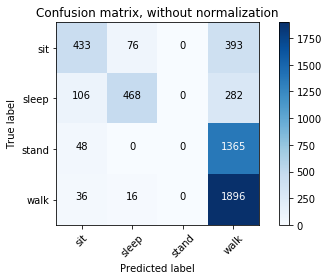

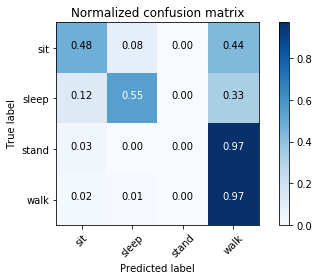

              precision    recall  f1-score   support

         sit       0.70      0.48      0.57       902
       sleep       0.84      0.55      0.66       856
       stand       0.00      0.00      0.00      1413
        walk       0.48      0.97      0.64      1948

   micro avg       0.55      0.55      0.55      5119
   macro avg       0.50      0.50      0.47      5119
weighted avg       0.45      0.55      0.46      5119



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subjects

In [34]:
filename = '../../model/svm_model.pkl'

model = pickle.load(open(filename,'rb'))

In [35]:
label_list = ['sit', 'sleep', 'stand', 'walk']

In [41]:
%run test_model.ipynb

#### After Post-process

In [42]:
unseen_patients = [str(i) for i in range(3001,3006)]

for subject_id in unseen_patients:
    df_acc_label, true_periods, pred_periods, iou = call_functions(subject_id, pca, model, label_list)

Loading 3001's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.3185689948892675, 0.0, 0.0, 0.226546212647672]
Loading 3002's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.08036739380022963, 0.004705882352941176, 0.0, 0.038696537678207736]
Loading 3003's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.0, 0.5692821368948247, 0.0, 0.13148049171566006]
Loading 3004's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.0, 0.0015313935681470138, 0.0, 0.01171303074670571]
Loading 3005's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.046, 0.0039177277179236044, 0.0, 0.0]


In [ ]:
unseen_patients = [str(i) for i in range(3001,3006)]

call_functions(all_subjects,pca)

In [ ]:
s = '3004'
df_sid = load_actual_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca)
df_y = predict(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pp_periods, actual_periods)

In [103]:
print(df_y.shape, df_test.shape)

(2583, 3) (2642, 5)


# Display Table

In [ ]:
from prettytable import PrettyTable

In [ ]:
print(s)
print(df_y)

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
print(t)

In [ ]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [ ]:
print(tabl_act_chng)

## Active Inactive AC (ALL)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [ ]:
print(tabl_act)

# Convert Time to String Method

In [ ]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(labels_list)):
    lb = labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

# Activity Durations Table

In [ ]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

# Bar Chart for Every 5 Minutes

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [ ]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [ ]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [ ]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

## Plot Bar Graph

In [ ]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()